### Boston 집값 예제 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [22]:
boston = load_boston() 
X_train, X_test, y_train, y_test = train_test_split( boston.data, boston.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [25]:
def load_extended_boston():
    boston = load_boston() 
    X = MinMaxScaler().fit_transform(boston.data)
    P = PolynomialFeatures(degree=2, include_bias=False)    
    X = P.fit_transform(X)
    print(P.get_feature_names())
    return X, boston.target

X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train) , ridge.score(X_test, y_test)

(0.885796658517094, 0.7527683481744754)

In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train) , ridge10.score(X_test, y_test)

(0.7882787115369614, 0.6359411489177311)

In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge01.score(X_train, y_train) , ridge01.score(X_test, y_test)

(0.9282273685001986, 0.7722067936479804)

### 시각화

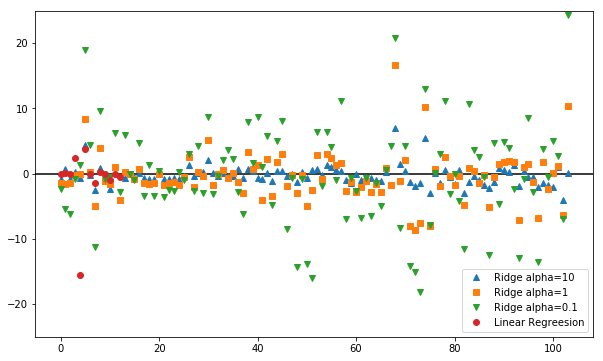

In [19]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Linear Regreesion")
xlims = plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()